transactions.csv 
Набор данных с самими транзакциями клиентов. Это самые актуальные данные, необходимые для решения задачи, приблизительно 350 тысяч транзакций. 
Как и все данные в этом соревновании, эти данные являются синтетическими, полученными путем модельной генерации последовательностей, модели для которых были обучены на основе реальных банковских датасетов. Дополнительная информация о процессе генерации доступна в разделе FAQ, а также будет изложена во время награждения в рамках Data Halloween.  
Структура данных: каждой транзакции соответствует строка в таблице, в которой содержится следующая информация: 

clnt_id — идентификатор клиента, по которому можно найти дополнительную информацию в других таблицах;
date — относительная дата, в которую была совершена транзакция;
mcc_id — идентификатор типа транзакции (Merchant Category Code). Предоставленные в рамках соревнования данные являются синтетическими, однако в реальных приложениях данный код определяет тип транзакции. 
Примеры кодов в реальных приложениях: “оплата в кафе и ресторанах”, “начисление зарплаты”, “снятие наличных в банкомате” и другие. Как правило, в банковских системах используются более 10 000 различных кодов, но в рамках предложенных данных мы сгенерировали только 50.
sum — сумма транзакции. Может быть как положительной (начисление на счет), так и отрицательной. Подробнее о структуре сумм внутри различных кодов транзакций можно узнать, начав анализировать данные :)

crm_data.csv
Данные, эмулирующие результат выгрузки из CRM (Customer relationship management) системы, представляют собой таблицу с перечнем самой разной информации о клиенте, доступной в моменте. Как и в реальных CRM-системах, различная информация может храниться в разных системах, иметь разную степень свежести, и иметь еще множество увлекательных для аналитиков свойств. 
Таблица содержит информацию о 2899 клиентах и содержит 20 столбцов с различной информацией о клиентах. Для участников самое важное в этих данных — поле clnt_id, соответствующее clnt_id в других таблицах, предоставленных в рамках соревнования. 
Самые важные поля в этой таблице следующие:

clnt_id — идентификатор клиентов банка;
is_premium — целевая переменная, которую нужно предсказать: 1- клиенты, имеющие премиальную карту; 0 - обычные клиенты. Целевая переменная доступна не для всех клиентов и именно в ее предсказании для новых клиентов и состоит задача соревнования. 
В процессе генерации предоставленного синтетического файла ни один реальный клиент не пострадал :) 

crm_goose.csv
По сценарию соревнования это те данные, которые остались в наследство от прежнего дата саентиста. Этот специалист уже ранее подступался к данной задаче, но не успел ни довести ее до пилотирования, ни передать по ней дела — столь сильно было желание сменить поле деятельности (мы его иногда прекрасно понимаем). К сожалению, этот специалист не только не слышал про воспроизводимость и REPA-ML, но нам даже не удалось отыскать код, воспроизводящий эти данные. Однако, сами данные уже содержат ряд признаков, которые могут помочь решить задачу. Помогут ли эти признаки участникам — узнаем на Data Halloween, когда мы раскроем backstage про подготовку задачи.

sample_subm
Это пример тестового файла, который вам нужно отправить продакт-менеджеру, пригласившему вас помочь с задачей предсказания премиальных клиентов. В банке стало больше новых клиентов и нужно предсказать, станут ли они пользователями премиальных карт или нет. Файл имеет следующую структуру:

clnt_id — идентификаторы новых клиентов банка, для которых нужно предсказать, станут ли они премиальными клиентами;
is_premium — бинарная метка вашего предсказания: 1 - станут премиальными клиентами; 0 - не станут. Обратите внимание: продакт-менеджера не интересуют ни вероятности, ни расстояния до разделяющих гиперплоскостей. Нужны просто четкие предсказания: станет или нет.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crm_data=pd.read_csv('crm_data.csv')
crm_data

clnt_id  clnt_gender  clnt_age clnt_device       clnt_device_get  \
0        2001          1.0        32  sO@*%lun08  vgIXi0LgoZHQ71Mmekm1   
1        2006          1.0        20  )!%OA9qpZP  lmE6l7DelsqZNYgxcsAZ   
2        2012          0.0        24  IgSHlRCsd#  yhUtC1GSVpWWNPCI9EYo   
3        2013          0.0        42  SSbZb5Hpun  TM4ptl78Lwzhng7PAY4G   
4        2014          0.0        25  N)Eb*EJXD4  lmE6l7DelsqZNYgxcsAZ   
...       ...          ...       ...         ...                   ...   
2894     4984          1.0        24  !Zusbz4GJ@  DUPFnmZiv2kqwJJgYK0p   
2895     4986          0.0        22  YBjx-RAB9!  4CdUr2g9UqwFuqdVaWdO   
2896     4987          0.0        24  nR4%tYIRXv  qhf9RhOTHsX15m3UzA94   
2897     4991          0.0        24  ^+3(I8C%&b                   NaN   
2898     4994          0.0        24  4(*Kax8&YS  Xlh4OkBJvFkCElKYmKNQ   

      has_car  has_estate  clnt_children  clnt_income  clnt_pick  \
0         0.0         0.0              1       180000          2   
1         1.0         0.0              0       250000          5   
2         NaN         0.0              0       310000          4   
3         1.0         0.0              1       110000          8   
4         1.0         0.0              1       300000          8   
...       ...         ...            ...          ...        ...   
2894      0.0         0.0              1       370000          5   
2895      0.0         1.0              0            0          2   
2896      1.0         0.0              0     21000000          4   
2897      1.0         0.0              3       380000          5   
2898      0.0         0.0              0        60000          4   

      clnt_fortune  clnt_status  clnt_system  spend_last  spend_level  \
0                6            3            1        1428          320   
1               11            4            1        1428         1000   
2                8            4            1        1428         1750   
3                9            6            1        1428         1180   
4               10            4            1        1428         1000   
...            ...          ...          ...         ...          ...   
2894            28            0            1        1427          100   
2895            30            6            1        1428         1000   
2896            31           27            1        1428         1000   
2897            26           25            1        1428          510   
2898            29            6            3        1428          100   

      spend_points  manager_contact  is_premium  
0               76           7227.0         1.0  
1               66           7227.0         1.0  
2               18           7233.0         1.0  
3               30           7227.0         1.0  
4               24           7227.0         1.0  
...            ...              ...         ...  
2894             0              NaN         NaN  
2895             0              NaN         NaN  
2896             0              NaN         NaN  
2897             0              NaN         NaN  
2898             0              NaN         NaN  

[2899 rows x 18 columns]

In [3]:
crm_goose=pd.read_csv('crm_goose.csv')
crm_goose

clnt_id  grey_goose_F0  grey_goose_F1  grey_goose_F2  grey_goose_F3  \
0        3700              0              1              1              1   
1        4545              0              0              1              1   
2        3656              0              1              0              0   
3        4445              1              1              1              1   
4        4112              0              1              1              0   
...       ...            ...            ...            ...            ...   
2909     4320              1              1              1              1   
2910     4242              0              0              0              0   
2911     4676              0              0              0              0   
2912     4556              0              1              1              1   
2913     4970              0              0              1              1   

      grey_goose_F4  goose_agg_0  goose_agg_1   goose_agg_2  goose_agg_3  ...  \
0                 0         98.0     -87449.0   2138.696906        113.0  ...   
1                 0         94.0    -542660.0  25775.051604        107.0  ...   
2                 1          NaN          NaN           NaN          NaN  ...   
3                 0         46.0    -122665.0   9808.466833         54.0  ...   
4                 0          NaN          NaN           NaN          NaN  ...   
...             ...          ...          ...           ...          ...  ...   
2909              0          9.0     -44179.0   4146.928254         10.0  ...   
2910              0         23.0     -72742.0   3087.292634         26.0  ...   
2911              1         18.0     -51821.0   4353.479389         20.0  ...   
2912              0         52.0     -50623.0   1448.669609         60.0  ...   
2913              0         19.0     -31867.0   4324.512022         25.0  ...   

      wild_goose_A_0  wild_goose_A_1  wild_goose_A_2  wild_goose_A_3  \
0        5743.754372     2362.996967         -6000.0             NaN   
1                NaN    14289.920941        -22000.0             NaN   
2                NaN     1530.359435         -3800.0        -10500.0   
3         871.779789     3386.310076        -10000.0             NaN   
4                NaN     3755.440498         -8000.0         -1111.0   
...              ...             ...             ...             ...   
2909             NaN        0.000000        -10000.0             NaN   
2910             NaN     3948.468198        -13000.0             NaN   
2911             NaN     1649.724583         -4000.0             NaN   
2912             NaN     1419.481908         -8000.0             NaN   
2913     6222.539674     5619.899081        -17700.0             NaN   

      wild_goose_A_4  wild_goose_A_5  wild_goose_A_6  wild_goose_A_7  \
0                NaN             NaN             NaN             NaN   
1           100000.0             NaN             NaN             NaN   
2            20000.0             NaN             NaN             NaN   
3                NaN             NaN             NaN             NaN   
4              720.0             1.0           -39.0             NaN   
...              ...             ...             ...             ...   
2909             NaN             NaN             NaN             NaN   
2910             NaN             NaN             NaN             NaN   
2911             NaN             NaN             NaN             NaN   
2912             NaN             NaN             NaN             NaN   
2913             NaN             NaN             NaN             NaN   

      wild_goose_A_8  wild_goose_A_9  
0       12831.625239             5.0  
1                NaN             6.0  
2        9347.738140             6.0  
3         935.269034             6.0  
4         934.470566            16.0  
...              ...             ...  
2909             NaN             1.0  
2910             NaN             1.0  
2911             NaN       

In [4]:
transactions=pd.read_csv('transactions.csv')
transactions

clnt_id  date  mcc_id     sum
0          2013  1211      44  1000.0
1          2019  1211       5  -176.0
2          2019  1211       5  -105.0
3          2019  1211      33 -2000.0
4          2019  1211      33  -230.0
...         ...   ...     ...     ...
350412     4987  1449      43 -5000.0
350413     4988  1449       5  -409.0
350414     4989  1449       5  -299.0
350415     4994  1449      12 -1200.0
350416     4996  1449       8  -266.0

[350417 rows x 4 columns]

Рассмотрим crm_data

In [5]:
crm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2899 entries, 0 to 2898
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   clnt_id          2899 non-null   int64  
 1   clnt_gender      2786 non-null   float64
 2   clnt_age         2899 non-null   int64  
 3   clnt_device      2801 non-null   object 
 4   clnt_device_get  2801 non-null   object 
 5   has_car          2692 non-null   float64
 6   has_estate       2711 non-null   float64
 7   clnt_children    2899 non-null   int64  
 8   clnt_income      2899 non-null   int64  
 9   clnt_pick        2899 non-null   int64  
 10  clnt_fortune     2899 non-null   int64  
 11  clnt_status      2899 non-null   int64  
 12  clnt_system      2899 non-null   int64  
 13  spend_last       2899 non-null   int64  
 14  spend_level      2899 non-null   int64  
 15  spend_points     2899 non-null   int64  
 16  manager_contact  755 non-null    float64
 17  is_premium    

In [6]:
crm_data.describe()

clnt_id  clnt_gender     clnt_age      has_car   has_estate  \
count  2899.000000  2786.000000  2899.000000  2692.000000  2711.000000   
mean   3501.526388     0.502513   104.801311     0.503715     0.148654   
std     865.813819     0.500083   376.473500     0.500079     0.355812   
min    2000.000000     0.000000    19.000000     0.000000     0.000000   
25%    2748.500000     0.000000    23.000000     0.000000     0.000000   
50%    3502.000000     1.000000    26.000000     1.000000     0.000000   
75%    4249.500000     1.000000    31.000000     1.000000     0.000000   
max    4999.000000     1.000000  2001.000000     1.000000     1.000000   

       clnt_children   clnt_income    clnt_pick  clnt_fortune  clnt_status  \
count    2899.000000  2.899000e+03  2899.000000   2899.000000  2899.000000   
mean        0.332873  8.736288e+05     4.456019     19.514660     9.270093   
std         0.579074  4.225547e+06     2.879040      5.048834     6.429195   
min         0.000000  0.000000e+00     0.000000      5.000000     0.000000   
25%         0.000000  1.000000e+05     2.000000     16.000000     4.000000   
50%         0.000000  2.000000e+05     4.000000     20.000000     9.000000   
75%         1.000000  3.000000e+05     7.000000     23.000000    15.000000   
max         4.000000  3.900000e+07     9.000000     34.000000    31.000000   

       clnt_system   spend_last    spend_level  spend_points  manager_contact  \
count  2899.000000  2899.000000    2899.000000    2899.00000       755.000000   
mean      1.223870  1427.168679     839.284926      24.61573      7215.978808   
std       0.469096     6.500000    2716.802823      65.01844        33.099153   
min       1.000000  1295.000000       0.000000       0.00000      7122.000000   
25%       1.000000  1428.000000     200.000000       0.00000      7227.000000   
50%       1.000000  1428.000000     427.000000       0.00000      7227.000000   
75%       1.000000  1428.000000     980.000000       0.00000      7227.000000   
max       3.000000  1428.000000  120000.000000     594.00000      7248.000000   

        is_premium  
count  1538.000000  
mean      0.469441  
std       0.499228  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

Есть выбросы по возрасту, 2001 явно кто-то перепутал дату рождения и возраст, плюс среднее превышает в 3 раза 75% квартиль. У 75+ нету недвижимости. Среднее по доходу превышает 75% квартиль. Spend last очень странные значения, spend_level надо изучить вместе со spend_points и manager_contact.

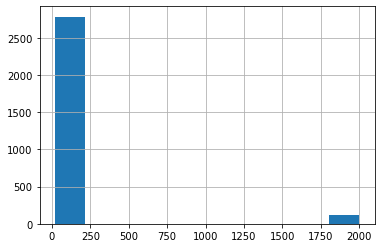

In [7]:
crm_data.clnt_age.hist()

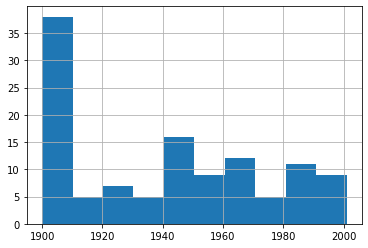

In [8]:
crm_data.loc[crm_data['clnt_age']>1700].clnt_age.hist()

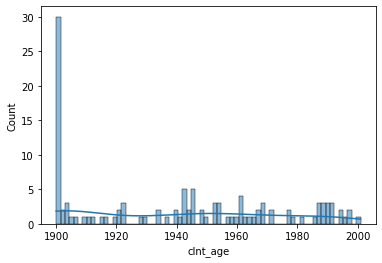

In [9]:
sns.histplot(crm_data.loc[crm_data['clnt_age']>1700].clnt_age, kde=True,bins=70)
plt.show()

In [10]:
len(crm_data.loc[crm_data['clnt_age']==1900])

30

1900 заменили как нет данных, надо будет заменить их. С остальными пока не знаю что делать.

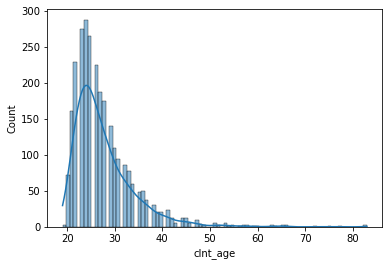

In [11]:
sns.histplot(crm_data.loc[crm_data['clnt_age']<250].clnt_age, kde=True,bins=85)
plt.show()

In [12]:
max(crm_data.loc[crm_data['clnt_age']<250].clnt_age)

83

In [13]:
min(crm_data.loc[crm_data['clnt_age']>1900].clnt_age)

1902

Если у кого-то стоит год 1902, то ему уже 118 лет, что вряд ли вероятно, ведь максимум по обычным годам равен лишь 83, плюс скорее всего это будет сильно влиять на алгоритм, поэтому стоит их поставить в Null

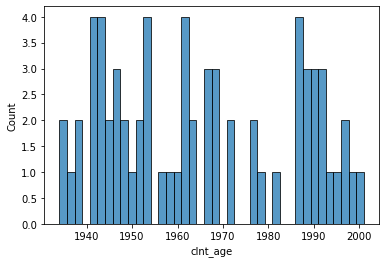

In [14]:
sns.histplot(crm_data.loc[crm_data['clnt_age']>1930].clnt_age,bins=40)
plt.show()

In [15]:
len(crm_data.loc[crm_data['clnt_age']>1930].clnt_age)

67

In [16]:
len(crm_data.loc[crm_data['clnt_age']>1900].clnt_age)

87

20 значений с высокой вероятностью ошибки, лучше их будет тоже заменить на Null

In [17]:
crm_data.loc[(crm_data['clnt_age']>=1900) & (crm_data['clnt_age']<1940),'clnt_age']=np.nan

In [18]:
crm_data.loc[crm_data['clnt_age']>1900,'clnt_age']=2020-crm_data.loc[crm_data['clnt_age']>1900,'clnt_age']

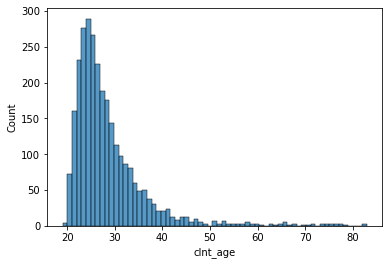

In [19]:
sns.histplot(crm_data.clnt_age)

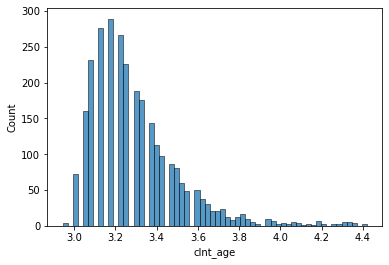

In [20]:
sns.histplot(np.log(crm_data.clnt_age),bins=60)

Распределение похоже на нормальное, но с длинным хвостом справа, поэтому лучше будет прологарифмировать и сохранить как столбец.

In [21]:
crm_data['log_age']=np.log(crm_data.clnt_age)

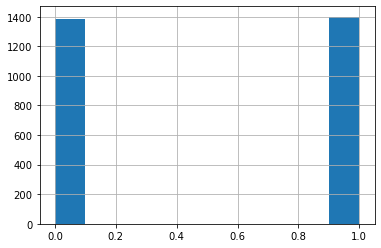

In [22]:
crm_data.clnt_gender.hist()

In [23]:
crm_data.clnt_device.unique()

array(['sO@*%lun08', ')!%OA9qpZP', 'IgSHlRCsd#', 'SSbZb5Hpun',
       'N)Eb*EJXD4', '_)nLk%PngJ', 'vJ#XVpcNy6', 'pi&NYvrpiu',
       'NMZa(_ZevK', 'tZet+bbIC_', 'T+BA%psI8c', 'ghOfqAzHdO',
       '+qOE#oK7Bu', 'm1o4W&JCvy', nan, 'Y1+5*e_(9D', 'rcJgTotoi8',
       'KnasAzg4Vf', 'tyOjI2@FcB', 'A&D5V21q5$', '$pffcP&pkj',
       '^+3(I8C%&b', 'Nljw_d_PZV', 'rreI!9jkPq', 'WUn^8@yRRZ',
       'm4Onx$jC_+', '+d)U@Ozdq@', 'R6B&KN5OOi', 'K*)FJ)edcZ',
       '&qrVc7H^jE', '4(*Kax8&YS', '@bM12Da%6&', 'cN50%TMttL',
       '4!5PbGR!VN', 'W@&0muZANj', '6J4&mF&#tl', 'UaSer)d$CZ',
       'y3FVI6dzfi', 'gTkSzDk+OA', 'yJrFzC0McE', 'nR4%tYIRXv',
       'AWrJqks-tw', '!Zusbz4GJ@', 'sUse$3S4Z%', '4aQwCtPL4(',
       'H#s_lw9F_R', 'exk&etBeLF', 'Bg01S^%Jfy', 'jso!fQ*Q7x',
       'py_Z4O$Gg+', '_cbxM0a-Yi', '-(Tu#R_@lh', 'zzhjn9-Ew-',
       'xAZj4fx97F', 'vB5-)b$ZR+', '_)nAgN9)Gz', 'fXm+BayjVA',
       'YBjx-RAB9!', '&UiIgr6b05', 'C_QpEX%9CB', '(O@$+)2-Iq'],
      dtype=object)

С учетом их примерно одинакового непонятного сложения, лучше будет просто перевести с помощью labelencoder

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [26]:
crm_data['le_device']=le.fit_transform(crm_data.clnt_device.astype(str))

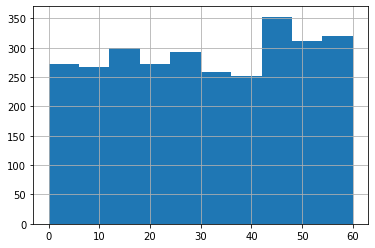

In [27]:
crm_data.le_device.hist()

Распределено примерно равномерно

In [28]:
crm_data.clnt_device_get.unique()

array(['vgIXi0LgoZHQ71Mmekm1', 'lmE6l7DelsqZNYgxcsAZ',
       'yhUtC1GSVpWWNPCI9EYo', 'TM4ptl78Lwzhng7PAY4G',
       'EAE3RcxIwQfn3oIbcXZN', 'RD8BUJjq4e1qknku300N',
       'yHrDLKQ3V9TnmM5OZdNu', 'Xlh4OkBJvFkCElKYmKNQ',
       'liZPCZF6tFgGEt1bTPHs', 'noI8N7cvgfYPRswJVqSt',
       '4tn4ahgRkWMzsSCk5tnp', 'zY5grwt3TK2vXDNOXNtQ',
       'xwVatkCS227il3xATBFE', 'Jw5OmlNzw1TWSySS8Kz6',
       'Wlb9y8b5EujLakHZQZ0D', 'SYy2B7hNPyV792L5eCqu',
       'RKcjWOC0kWGyGsDi325Q', 'duj1wNy6PQygCaQYt6ze',
       'apqNDBwDXCytWs6F1c29', 'a25dNMsZKjRHnhp7WJkD',
       'zPz024CQIonY5H9jYIve', 'vtFJx028ksA5j1r4Gevb',
       '6153L0t8XPPwrqlaHrPc', 'U5K7lQEiD5wBoxQfY6Tz',
       'qhf9RhOTHsX15m3UzA94', 'JZ0KLFgkXP3A9WMANoni',
       'nrQMSSqhv27ILkeKQI8X', 'NJRRltMExbMcFROsvdGD',
       'ZRg0ZwLzu2FL5jted9eX', 'AEvBGGIi1TYMZpsS5CoK',
       'DAHGwLtn4JPcATVSWFHk', 'u6H8Em4pxxagN7S8TAR5',
       'DLtGblMWq46ducD1uhFp', 'C6o0rm2Kne9WJe6IrQhX',
       'jEt2cvpo9kv8BjV7S6ay', 'Jsdxxb8QCqG5031DdLI5',
       'hp

In [29]:
crm_data['le_device_get']=le.fit_transform(crm_data.clnt_device_get.astype(str))

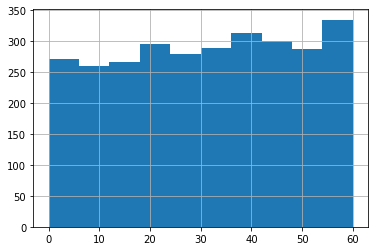

In [30]:
crm_data.le_device_get.hist()

То же самое

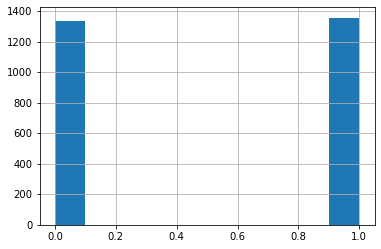

In [31]:
crm_data.has_car.hist()

has_estate       2711 non-null   float64

 7   clnt_children    2899 non-null   int64  
 
 8   clnt_income      2899 non-null   int64  
 
 9   clnt_pick        2899 non-null   int64  
 
 10  clnt_fortune     2899 non-null   int64  
 
 11  clnt_status      2899 non-null   int64  
 
 12  clnt_system      2899 non-null   int64  
 
 13  spend_last       2899 non-null   int64  
 
 14  spend_level      2899 non-null   int64  
 
 15  spend_points     2899 non-null   int64  
 
 16  manager_contact  755 non-null    float64
 
 17  is_premium       1538 non-null   float64

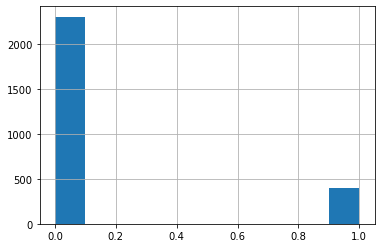

In [32]:
crm_data.has_estate.hist()

Вот тут резкий перекос

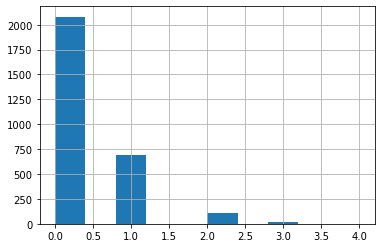

In [33]:
crm_data.clnt_children.hist()

Логарифмическое распределение получается. Окей.

Интересная странность в том, что владение недвижимостью указали не все, в то же время про детей рассказали все, пока не знаю зачем, но интересно.

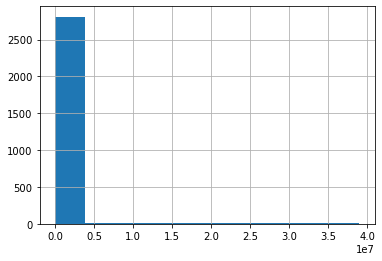

In [34]:
crm_data.clnt_income.hist()

Можно ли опираться на этот столбец? Если данных очень мало.

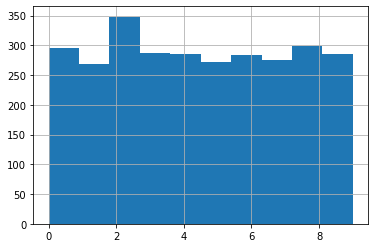

In [35]:
crm_data.clnt_pick.hist()

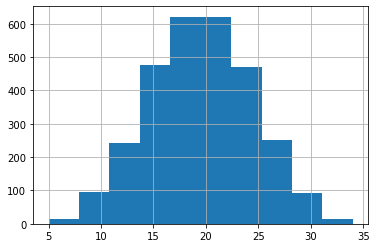

In [36]:
crm_data.clnt_fortune.hist()

Слишком красиво, слишком ровно, слишком странно.

Проблема еще в том, что не особо понятно, что этот столбец значит. Ладно.

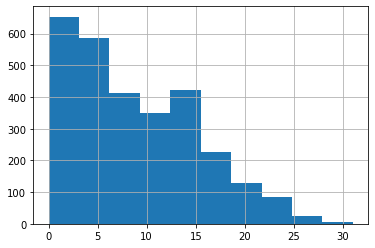

In [37]:
crm_data.clnt_status.hist()

Очень странный треугольник, треугольное распределение с модой вначале?

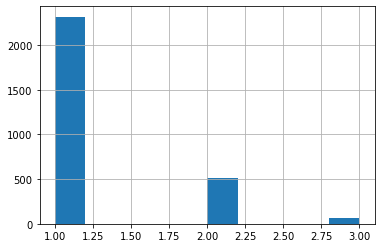

In [38]:
crm_data.clnt_system.hist()

Что-то сильно напоминающее логарифмическое распределение

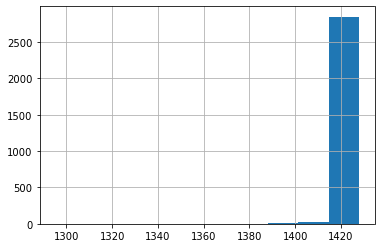

In [39]:
crm_data.spend_last.hist()

Похоже на крайне бесполезный столбец, но пока непонятно как он соотносится с остальными

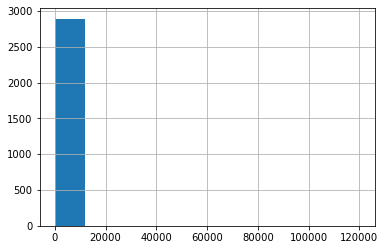

In [40]:
crm_data.spend_level.hist()

In [41]:
crm_data.loc[crm_data['spend_level']>20000].spend_level

335      60000
1254    120000
Name: spend_level, dtype: int64

Всего лишь два значения больше 20к, а что у них по премиуму?

In [42]:
crm_data.loc[crm_data['spend_level']>20000].is_premium

335     1.0
1254    0.0
Name: is_premium, dtype: float64

У них уже проставлен, причем самое интересное то, что у наибольшего spend_level не премиум, поэтому может негативно влиять на алгоритм, надо будет посмотреть потом корреляции общие и определить, стоит ли удалять.

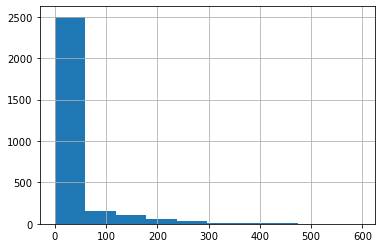

In [43]:
crm_data.spend_points.hist()

In [44]:
crm_data.loc[crm_data['spend_points']>300].spend_points,crm_data.loc[crm_data['spend_points']>300].is_premium

(15     516
 45     332
 56     335
 91     367
 95     404
 155    429
 168    434
 178    344
 189    334
 220    476
 249    354
 253    359
 271    398
 325    371
 329    358
 336    367
 381    336
 384    362
 394    362
 454    412
 461    306
 465    594
 475    375
 545    316
 565    403
 576    388
 633    462
 635    327
 657    442
 716    327
 Name: spend_points, dtype: int64,
 15     1.0
 45     1.0
 56     1.0
 91     1.0
 95     1.0
 155    1.0
 168    1.0
 178    1.0
 189    1.0
 220    1.0
 249    1.0
 253    1.0
 271    1.0
 325    1.0
 329    1.0
 336    1.0
 381    1.0
 384    1.0
 394    1.0
 454    1.0
 461    1.0
 465    1.0
 475    1.0
 545    1.0
 565    1.0
 576    1.0
 633    1.0
 635    1.0
 657    1.0
 716    1.0
 Name: is_premium, dtype: float64)

У всех исключений премиум

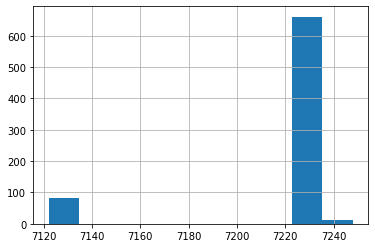

In [45]:
crm_data.manager_contact.hist()

Мало данных, очень странное распределение, может повлиять не самым полезным образом.

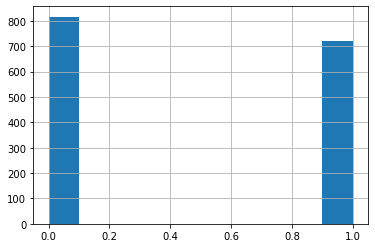

In [46]:
crm_data.is_premium.hist()

In [47]:
crm_data.columns

Index(['clnt_id', 'clnt_gender', 'clnt_age', 'clnt_device', 'clnt_device_get',
       'has_car', 'has_estate', 'clnt_children', 'clnt_income', 'clnt_pick',
       'clnt_fortune', 'clnt_status', 'clnt_system', 'spend_last',
       'spend_level', 'spend_points', 'manager_contact', 'is_premium',
       'log_age', 'le_device', 'le_device_get'],
      dtype='object')

In [48]:
crm_data.drop(['clnt_device','clnt_age','clnt_device_get'],axis=1,inplace=True)

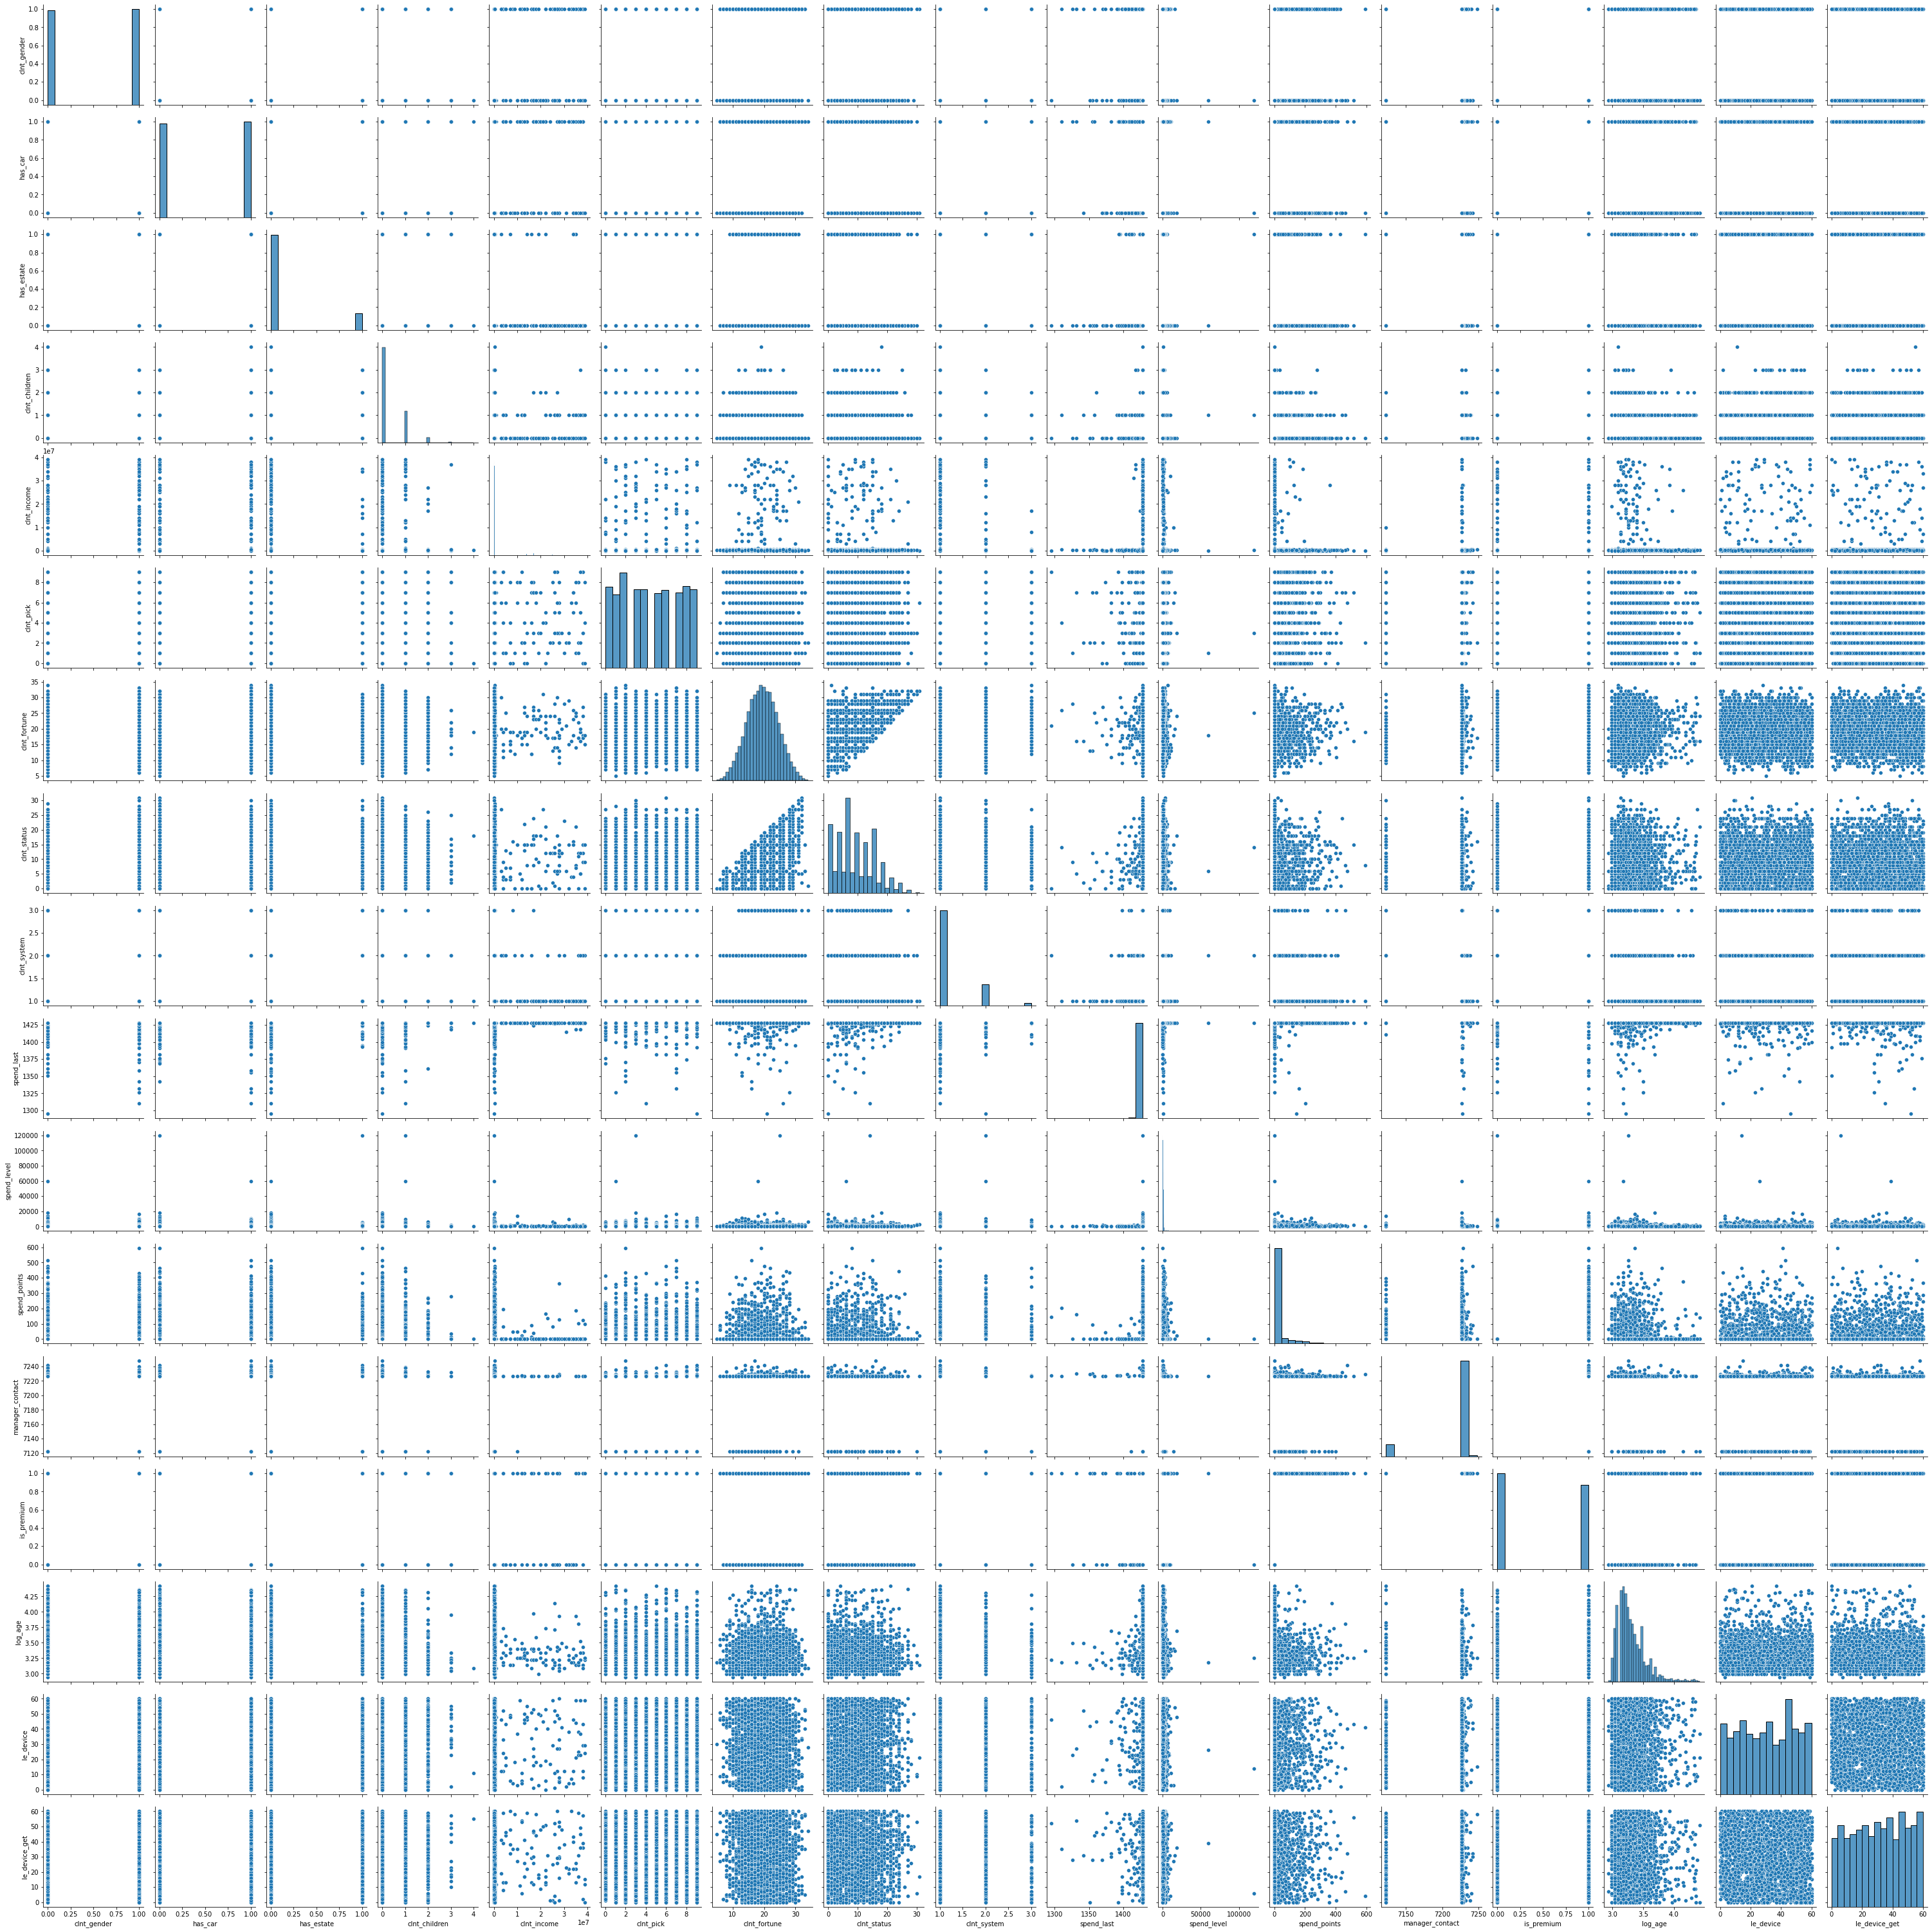

In [49]:
sns.pairplot(crm_data.drop(['clnt_id'],axis=1))

Вот так, если окинуть взглядом, многие графики выглядит странно, например максимально нормальное распределение, три параллелограмма, треугольники, многие интересно с исследуемой переменной пересекаются

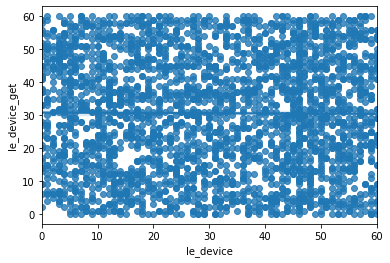

In [50]:
sns.regplot(data=crm_data,x='le_device',y='le_device_get')

создается ощущение, что корреляция очень высока у этих двух переменных

In [51]:
crm_data.loc[crm_data['le_device']==0,'le_device_get'].unique(),len(crm_data.loc[crm_data['le_device']==0,'le_device_get'].unique())

(array([42, 45, 38, 33, 51, 55, 21, 50, 20, 41, 27, 44, 48, 37, 28, 24,  9,
        59,  2, 14, 16,  6, 58, 17, 52, 13, 56]),
 27)

In [52]:
crm_data.loc[crm_data['le_device']==1,'le_device_get'].unique(),len(crm_data.loc[crm_data['le_device']==1,'le_device_get'].unique())

(array([35, 25, 27, 18, 50, 30, 49, 11, 23, 12, 51, 60, 59, 54, 34, 55, 46,
        37, 15, 45, 47, 28,  4, 20,  7,  6, 33, 26,  9, 52, 43, 14]),
 32)

In [53]:
q=np.array([])
for i in range(61):
    w=len(crm_data.loc[crm_data['le_device']==i,'le_device_get'].unique())
    print(w,end='  ')
    q=np.append(q,w)
np.min(q),np.median(q),np.max(q)

27  32  25  30  35  37  36  29  28  33  35  35  37  31  28  27  37  34  32  35  31  35  33  27  32  32  34  34  34  30  26  32  31  34  28  21  32  35  27  33  27  32  31  35  37  35  52  34  43  32  41  33  36  36  36  32  35  34  25  33  26  

(21.0, 33.0, 52.0)

Если у клиента определенный девайс, то он медианно иметь лишь 33 других, от 21 до 52

In [54]:
q=np.array([])
for i in range(61):
    w=len(crm_data.loc[crm_data['le_device_get']==i,'le_device'].unique())
    print(w,end='  ')
    q=np.append(q,w)
np.min(q),np.median(q),np.max(q)

33  32  32  27  40  36  39  28  26  35  28  33  33  32  29  24  36  28  34  32  34  35  32  32  28  31  28  33  34  35  26  39  31  27  30  39  38  41  35  29  27  39  28  23  34  47  37  31  34  30  30  38  32  34  39  26  28  32  38  36  32  

(23.0, 32.0, 47.0)

Наоборот примерно одинаковые значения, чу-то это значит, пока просто запомнил.

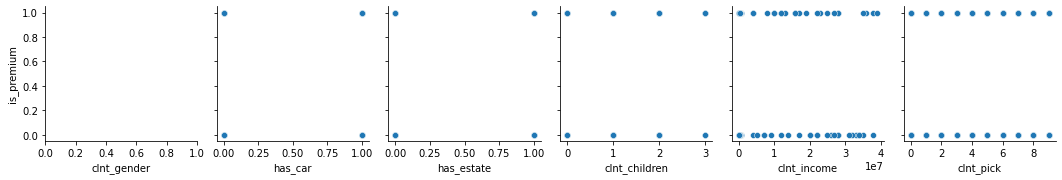

In [55]:
sns.pairplot(data=crm_data,y_vars=['is_premium'],x_vars=crm_data.columns[1:7])

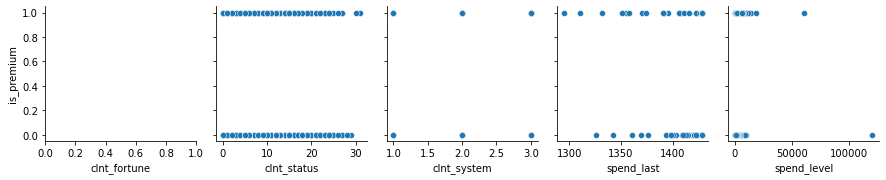

In [56]:
sns.pairplot(data=crm_data,y_vars=['is_premium'],x_vars=crm_data.columns[7:12])

Spend_level изучить

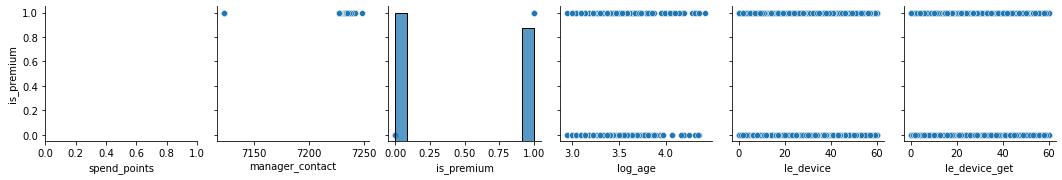

In [57]:
sns.pairplot(data=crm_data,y_vars=['is_premium'],x_vars=crm_data.columns[12:])

Если есть менеджер, то точно премиум

In [58]:
crm_data.loc[(crm_data['manager_contact']>7000) & (crm_data['is_premium'] != 1)]

clnt_id  clnt_gender  has_car  has_estate  clnt_children  clnt_income  \
1560     2060          1.0      0.0         1.0              0       300000   
1663     2278          1.0      0.0         0.0              0       200000   
1725     2421          0.0      0.0         0.0              0        70000   
1726     2422          0.0      0.0         0.0              1       220000   
1742     2457          NaN      1.0         1.0              0            0   
1757     2484          0.0      1.0         0.0              0       340000   
1764     2500          0.0      0.0         0.0              0       340000   
1766     2503          0.0      1.0         0.0              0            0   
1881     2783          0.0      0.0         0.0              0       110000   
1999     3022          0.0      0.0         0.0              1       390000   
2023     3067          1.0      0.0         1.0              0       190000   
2077     3192          0.0      1.0         NaN              0       340000   
2123     3304          0.0      1.0         0.0              0       210000   
2177     3427          1.0      1.0         0.0              0       210000   
2210     3491          1.0      1.0         0.0              2       260000   
2213     3495          0.0      1.0         0.0              1       230000   
2308     3702          1.0      1.0         0.0              0        80000   
2316     3713          0.0      1.0         NaN              0        10000   
2352     3803          0.0      1.0         0.0              0       500000   
2370     3840          1.0      0.0         0.0              0       330000   
2381     3860          0.0      1.0         0.0              0       160000   
2443     4003          1.0      1.0         NaN              1        40000   
2520     4172          0.0      NaN         0.0              0        50000   
2543     4225          1.0      0.0         0.0              0       210000   
2552     4250          1.0      1.0         0.0              0       290000   
2556     4258          0.0      0.0         0.0              1       260000   
2567     4278          0.0      1.0         1.0              0        60000   
2568     4279          0.0      0.0         1.0              0        60000   
2687     4540          0.0      1.0         0.0              0       260000   
2701     4576          1.0      0.0         1.0              0       260000   
2751     4671          0.0      1.0         0.0              1       220000   
2757     4691          1.0      0.0         0.0              0       300000   
2800     4787          0.0      1.0         NaN              0       340000   

      clnt_pick  clnt_fortune  clnt_status  clnt_system  spend_last  \
1560          0            11            3            1        1428   
1663          0            22           12            1        1428   
1725          6            12            9            1        1428   
1726          3            13            4            1        1428   
1742          0            21            0            1        1428   
1757          2            21            6            1        1428   
1764          7            10            0            1        1428   
1766          3            13            7            1        1428   
1881          0            23            0            1        1428   
1999          2            10            2            1        1428   
2023          9            19            8            1        1428   
2077          2            18            6            1        1428   
2123          4            13            2            1        1428   
2177          6            19            7            2        1428   
2210          7            20           11            1        1428   
2213          9            24           15            3        1428   
2308          4            15           12            2        1428   
2316          9            17            

Они все сразу премиум

In [59]:
crm_data.loc[(crm_data['manager_contact']>7000) ,'is_premium']=1

In [60]:
crm_data.drop('manager_contact',axis=1,inplace=True)

spend_level

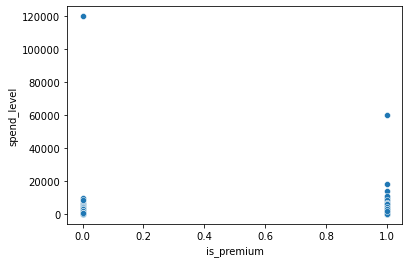

In [61]:
sns.scatterplot(data=crm_data,y='spend_level',x='is_premium')

Думаю что этот "не премиум" с очень большим spend_level, не просто так стал таким, надо будет посмотреть на его транзакции и просто изучить

In [62]:
crm_data.loc[crm_data['spend_level']>80000]

clnt_id  clnt_gender  has_car  has_estate  clnt_children  clnt_income  \
1254     3964          0.0      0.0         1.0              1       190000   

      clnt_pick  clnt_fortune  clnt_status  clnt_system  spend_last  \
1254          3            25           14            2        1428   

      spend_level  spend_points  is_premium   log_age  le_device  \
1254       120000             0         0.0  3.258097         14   

      le_device_get  
1254              6

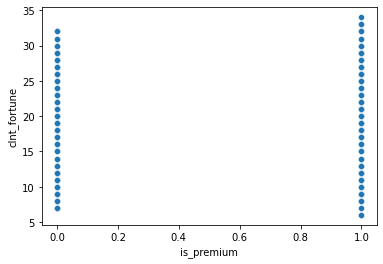

In [63]:
sns.scatterplot(data=crm_data,y='clnt_fortune',x='is_premium')

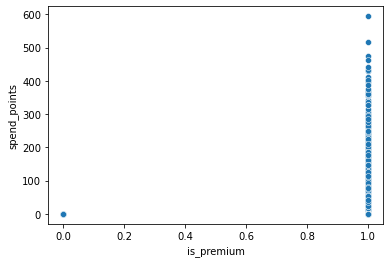

In [64]:
sns.scatterplot(data=crm_data,y='spend_points',x='is_premium')

In [65]:
crm_data.loc[crm_data['spend_points']>0].is_premium.unique()

array([1.])

In [66]:
crm_data.loc[crm_data['spend_points']==0].is_premium.unique()

array([ 1.,  0., nan])

Раз nan только когда =0, то этот столбец не нужен, получается, можно удалить.

In [67]:
crm_data.drop('spend_points',axis=1,inplace=True)

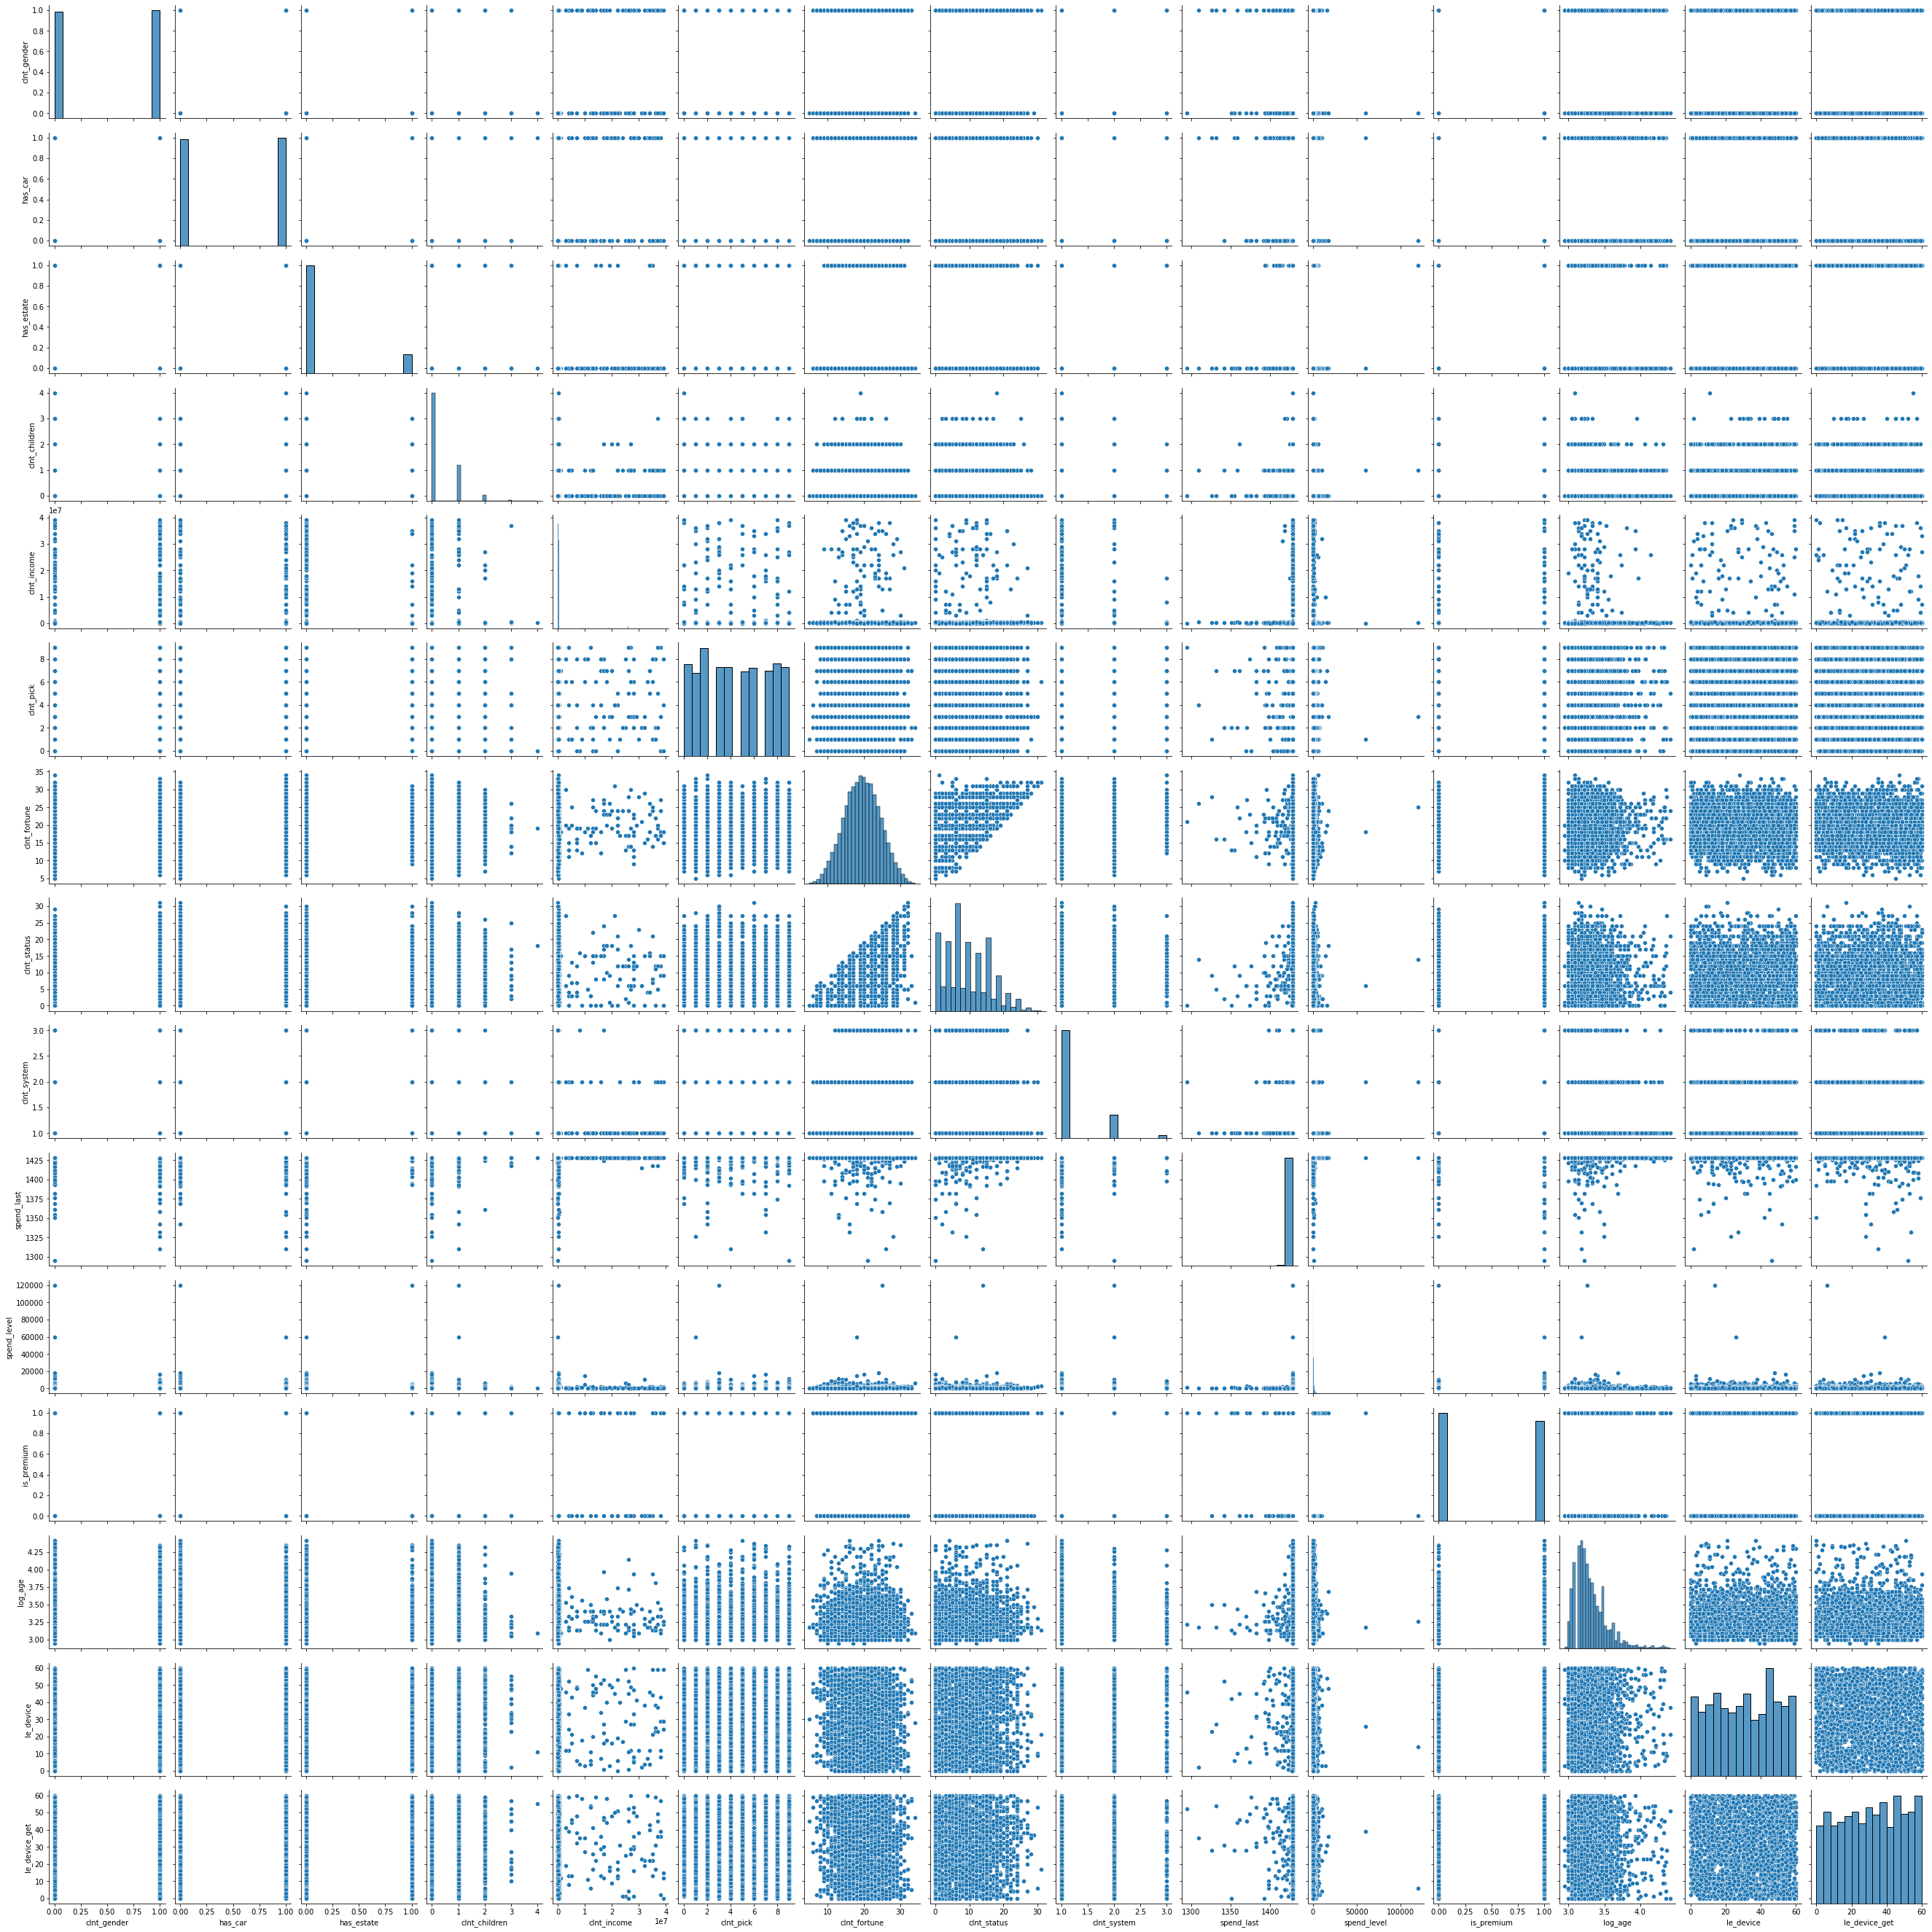

In [68]:
sns.pairplot(crm_data.drop('clnt_id',axis=1))

In [69]:
crm_data.columns

Index(['clnt_id', 'clnt_gender', 'has_car', 'has_estate', 'clnt_children',
       'clnt_income', 'clnt_pick', 'clnt_fortune', 'clnt_status',
       'clnt_system', 'spend_last', 'spend_level', 'is_premium', 'log_age',
       'le_device', 'le_device_get'],
      dtype='object')

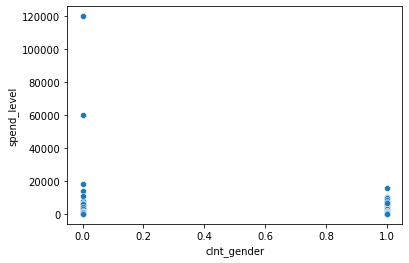

In [70]:
sns.scatterplot(data=crm_data,x='clnt_gender',y='spend_level')

Два выброса одного пола, окей

In [71]:
solve=crm_data.loc[(crm_data['is_premium']!=0) & (crm_data['is_premium']!=1)]
len(solve)


1328

In [72]:
len(crm_data)

2899

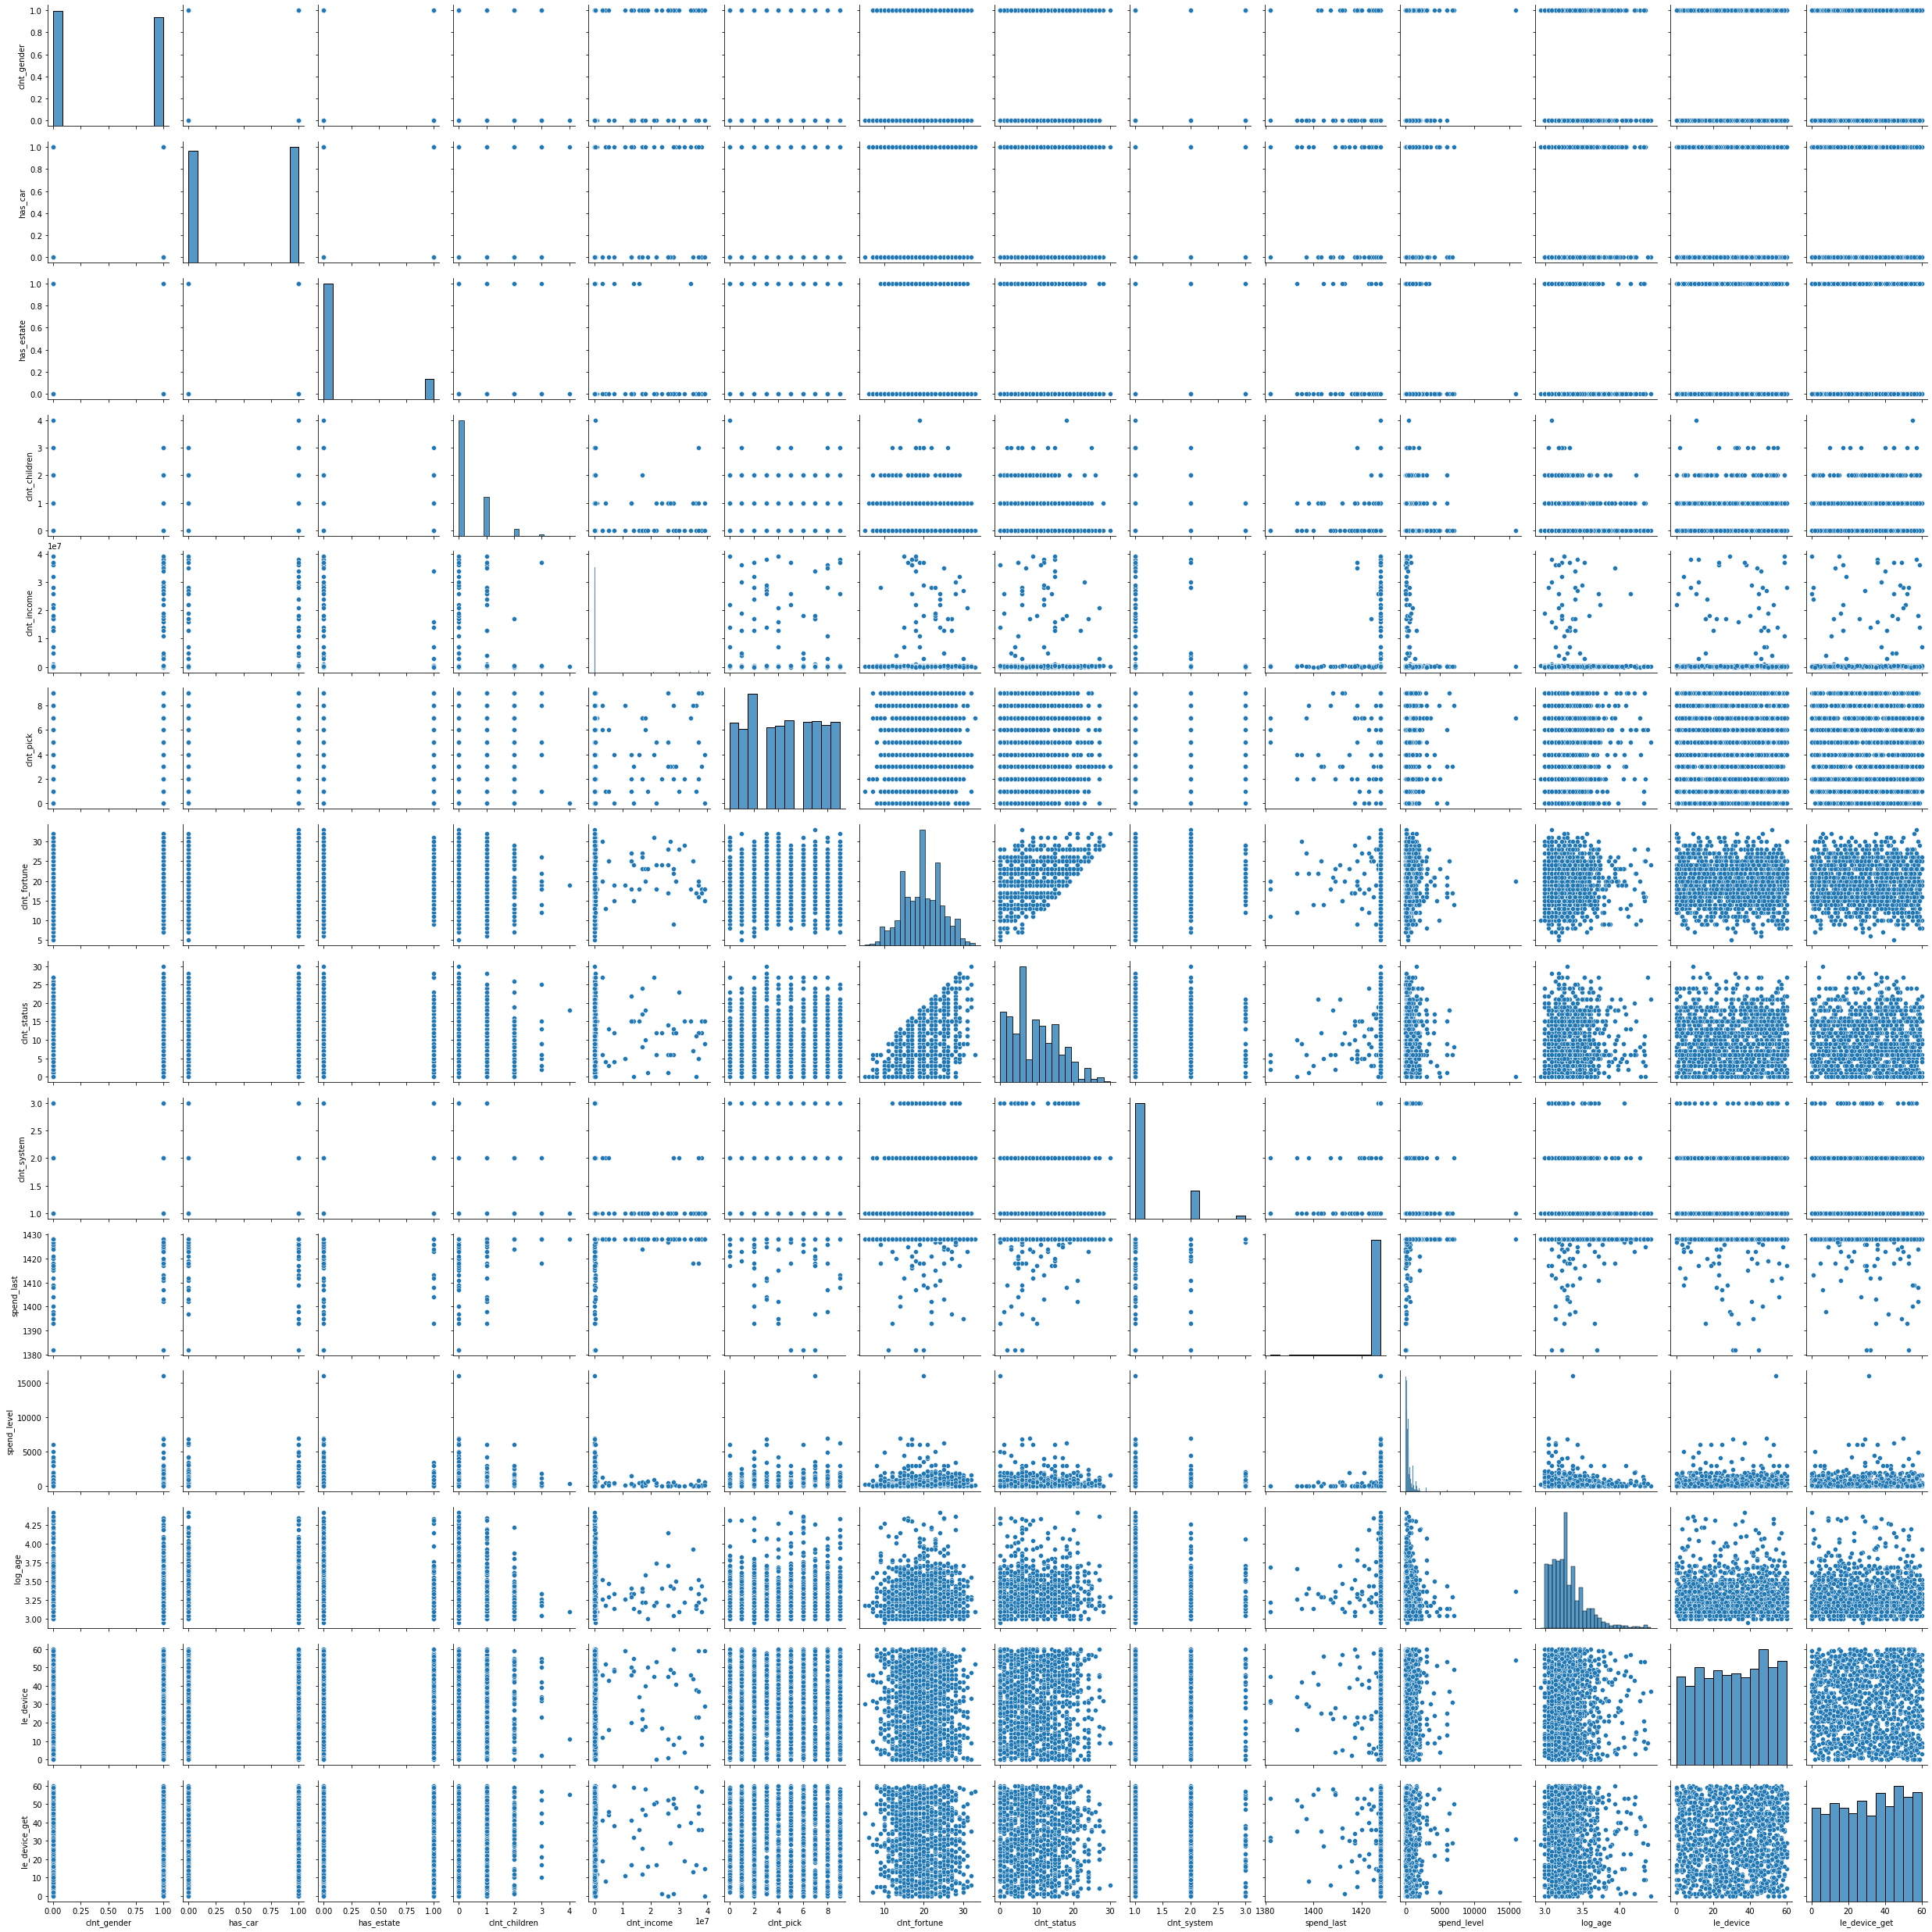

In [73]:
sns.pairplot(solve.drop(['clnt_id','is_premium'],axis=1))